In [128]:
from utilities import *

In [129]:
deep_network_layers = [10,5, 5, 5,1]
epochs = 20000
learning_rate = 0.1
noise_power = 0.1

In [130]:
X = np.load('X.npy')
y = np.load('y.npy') 
y += np.sqrt(noise_power)*np.random.randn(y.shape[0])

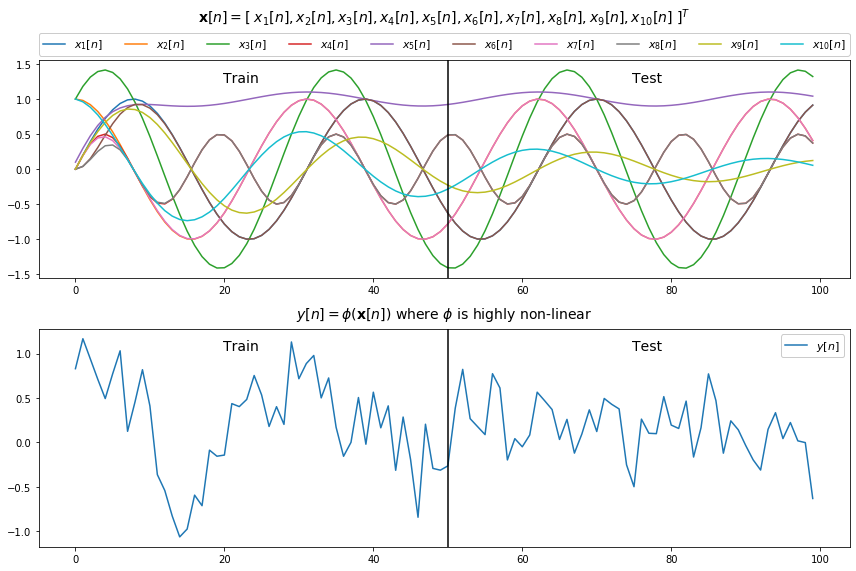

In [131]:
plot_data(X, y)

In [132]:
models = [LMS(), nonlinear_LMS(), deep_network(deep_network_layers)]

loss = train_models(X, y, models, epochs, learning_rate)

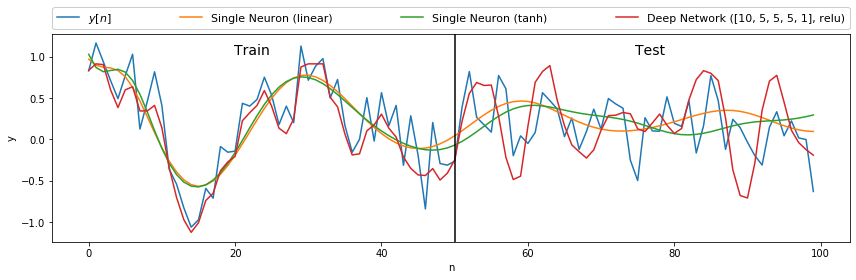

In [133]:
def plot_output(X, y, models, deep_network_layers):
    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,1,1)
    plt.plot(y)
    [plt.plot(model(torch.Tensor(X)).detach().numpy()) for model in models]
    plt.axvline(x=50,color='k')
    plt.text(0.25, 0.9, 'Train', horizontalalignment='center', fontsize=14, transform = ax.transAxes)
    plt.text(0.75, 0.9, 'Test', horizontalalignment='center', fontsize=14, transform = ax.transAxes)
    plt.xlabel("n")
    plt.ylabel("y")
    leg = plt.legend(['$y[n]$','Single Neuron (linear)','Single Neuron (tanh)','Deep Network ('+str(deep_network_layers)+', relu)'],
               bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=10, mode="expand", borderaxespad=0., fontsize=11)
    leg.get_frame().set_alpha(1)
    plt.tight_layout()
    return plt

fig = plot_output(X, y, models, deep_network_layers)
fig.savefig("4_7_4")

In [134]:
def plot_learning_curves(loss):
    plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 3) 

    for i, l in enumerate(loss):
        plt.subplot(gs[i])
        plt.plot(l[0])
        plt.plot(l[1])
        plt.legend(['Train Loss', 'Test Loss'])
        plt.ylabel("Loss")
        plt.xlabel("Epoch")
        plt.ylim(0, 0.3)

    plt.tight_layout()
    return plt

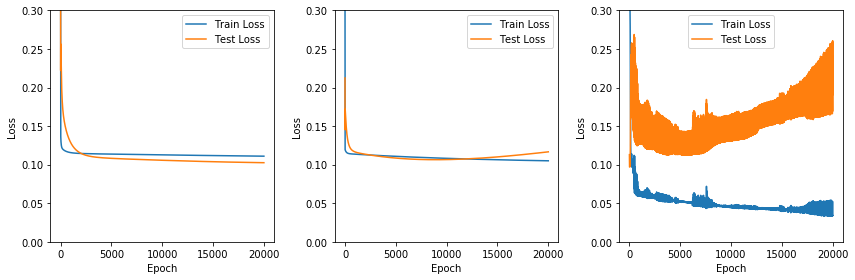

In [135]:
fig = plot_learning_curves(loss)
fig.savefig("4_7_5")